In [1]:
import cv2
import dlib
import numpy as np
import imutils
import matplotlib.pyplot as plt
import os

In [2]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
os.chdir(parent_dir)
os.getcwd()

'/Users/pareshar/Personal/Github/Facial-feature-detector'

Golden ratio: 1.618
Top nose to middle mouth vs middle mouth to bottom chin ratio: 1.6358600428537737
Middle mouth to bottom mouth vs top mouth to middle mouth ratio: 1.4005941409979252
Ideal ratio: 1
Eyes to between eyes ratio: 0.6521075125548985
Eyes to eyebrows vs eye height ratio: 3.2231388978279223
Left to right eye center vs mouth width: 1.413022361962211


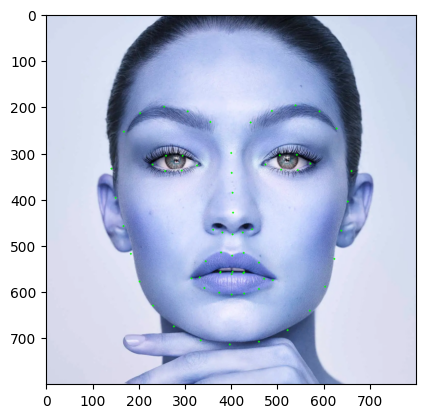

In [3]:
# static variables
path_to_images = "data/images_symmetry/"
image_files = os.listdir(path_to_images)
face_landmarks_model = 'models/face_alignment/shape_predictor_68_face_landmarks.dat'
face_detector_weights = "models/face_detection/res10_300x300_ssd_iter_140000.caffemodel"
face_detector_config = "models/face_detection/deploy.prototxt.txt"

def detect_face(image_path):
    # Load the dlib face detector and the shape predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(face_landmarks_model)

    # Load the image
    image = cv2.imread(image_path)
    image = imutils.resize(image, width=800)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect face in the image
    rects = detector(gray, 1)
    if len(rects) == 0:
        print("No face detected.")
        return

    for rect in rects:
        shape = predictor(gray, rect)
        shape = np.array([(shape.part(i).x, shape.part(i).y) for i in range(shape.num_parts)])

        # Draw facial landmarks
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

    # Compute ideal proportions
    # For simplicity, let's consider distance between eyes and mouth to compute ideal proportions using the golden ratio
    golden_ratio = 1.618
    left_side_left_eye, right_side_left_eye, left_side_right_eye, right_side_right_eye = shape[36], shape[39], shape[42], shape[45]
    left_eye_top, left_eye_bottom, right_eye_top, right_eye_bottom = shape[37], shape[41], shape[44], shape[46]
    left_eyebrow_top, right_eyebrow_top = shape[19], shape[24]
    left_eye_center = np.mean([shape[37], shape[38], shape[41], shape[40]], axis=0)
    right_eye_center = np.mean([shape[43], shape[44], shape[47], shape[46]], axis=0)
    top_mouth, middle_mouth, bottom_mouth, left_mouth, right_mouth = shape[51], shape[62], shape[57], shape[48], shape[54]
    top_nose, bottom_nose = shape[27], shape[33]
    bottom_chin = shape[8]
    
    print(f"Golden ratio: {golden_ratio}")
    
    top_nose_to_middle_mouth_dist = np.linalg.norm(top_nose - middle_mouth) # euclidean distance
    middle_mouth_to_bottom_chin_dist = np.linalg.norm(middle_mouth - bottom_chin)
    ratio_top_nose_to_middle_mouth_vs_middle_mouth_to_bottom_chin = top_nose_to_middle_mouth_dist/middle_mouth_to_bottom_chin_dist
    print(f"Top nose to middle mouth vs middle mouth to bottom chin ratio: {ratio_top_nose_to_middle_mouth_vs_middle_mouth_to_bottom_chin}")
    
    
    top_mouth_to_middle_mouth_dist = np.linalg.norm(top_mouth - middle_mouth)
    middle_mouth_to_bottom_mouth_dist = np.linalg.norm(middle_mouth - bottom_mouth)
    ratio_middle_mouth_to_bottom_mouth_vs_top_mouth_to_middle_mouth = middle_mouth_to_bottom_mouth_dist/top_mouth_to_middle_mouth_dist
    print(f"Middle mouth to bottom mouth vs top mouth to middle mouth ratio: {ratio_middle_mouth_to_bottom_mouth_vs_top_mouth_to_middle_mouth}")

    left_eye_dist = np.linalg.norm(left_side_left_eye - right_side_left_eye)
    right_eye_dist = np.linalg.norm(left_side_right_eye - right_side_right_eye)
    average_eye_dist = (left_eye_dist + right_eye_dist)/2
    between_eye_dist = np.linalg.norm(right_side_left_eye - left_side_right_eye)
    ratio_eyes_to_between_eye = average_eye_dist/between_eye_dist
    print("Ideal ratio: 1")
    print(f"Eyes to between eyes ratio: {ratio_eyes_to_between_eye}")


    left_eye_to_eyebrow_dist = np.linalg.norm(left_eyebrow_top - left_eye_top)
    right_eye_to_eyebrow_dist = np.linalg.norm(right_eyebrow_top - right_eye_top)
    eye_to_eyebrow_dist = (left_eye_to_eyebrow_dist + right_eye_to_eyebrow_dist)/2
    left_eye_height = np.linalg.norm(left_eye_top - left_eye_bottom)
    right_eye_height = np.linalg.norm(right_eye_top - right_eye_bottom)
    eye_height = (left_eye_height + right_eye_height)/2
    ratio_eye_to_eyebrow_vs_eye_height = eye_to_eyebrow_dist/eye_height
    print(f"Eyes to eyebrows vs eye height ratio: {ratio_eye_to_eyebrow_vs_eye_height}")


    left_to_right_eye_center_dist = np.linalg.norm(left_eye_center - right_eye_center)
    mouth_width = np.linalg.norm(left_mouth - right_mouth)
    ratio_left_to_right_eye_center_vs_mouth_width = left_to_right_eye_center_dist/mouth_width
    print(f"Left to right eye center vs mouth width: {ratio_left_to_right_eye_center_vs_mouth_width}")


    plt.imshow(image)
    plt.show()

detect_face(path_to_images + "gigi_hadid.webp")


# Resources

- Landmarks: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FShape-predictor-68-face-landmarks-A-flowchart-of-the-proposed-system-has-given-below-to_fig1_337569547&psig=AOvVaw0siUjIXR-uQXfK5ChiSWhP&ust=1695897500244000&source=images&cd=vfe&opi=89978449&ved=0CA8QjRxqFwoTCIif3NTMyoEDFQAAAAAdAAAAABAH


- https://livrepository.liverpool.ac.uk/3155800/1/201239927_June2022.pdf